## Data Dictionary

| Variable | Explanation |
|-------|-------|
| Index | Ticker symbol for indexes |
| Date | Date of observation |
| Open | Opening price |
| High | Highest price during trading day |
| Low | Lowest price during trading day |
| Close | Close price |
| Adj Close | Closing price adjusted for dividends and stock splits |
| Volume | Number of shares traded during trading day |
| CloseUSD | Close price in terms of USD |

[Source](https://www.kaggle.com/mattiuzc/stock-exchange-data) of dataset.

## Challenge

**Challenges are brief tasks designed to help you practice specific skills:**

- 🗺️ **Explore**: Which index has produced the highest average annual return?
- 📊 **Visualize**: Create a plot visualizing a 30 day moving average for an index of your choosing.
- 🔎 **Analyze**: Compare the volatilities of the indexes included in the dataset.

**Scenarios are broader questions to help you develop an end-to-end project for your portfolio:**

You are working for an investment firm that is looking to invest in index funds. They have provided you with a dataset containing the returns of 13 different indexes. Your manager has asked you to make short-term forecasts for several of the most promising indexes to help them decide which would be a good fund to include. Your analysis should also include a discussion of the associated risks and volatility of each fund you focus on.

You will need to prepare a report that is accessible to a broad audience. It should outline your motivation, steps, findings, and conclusions.

# Import Packages and Load Data (csv)

In [110]:
# Import module 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [169]:
# Read csv file (set Date as index and set data type to date 

index_fund = pd.read_csv('stock_exchange.csv', index_col="Date", parse_dates = True)
index_fund.info()
index_fund.sample(10)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 104224 entries, 1986-12-31 to 2021-05-31
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Index      104224 non-null  object 
 1   Open       104224 non-null  float64
 2   High       104224 non-null  float64
 3   Low        104224 non-null  float64
 4   Close      104224 non-null  float64
 5   Adj Close  104224 non-null  float64
 6   Volume     104224 non-null  float64
 7   CloseUSD   104224 non-null  float64
dtypes: float64(7), object(1)
memory usage: 7.2+ MB


,Index,Open,High,Low,Close,Adj Close,Volume,CloseUSD
Date,,,,,,,,
2008-05-13,GDAXI,7062.600098,7080.859863,7002.370117,7060.189941,7060.189941,1.417237e+08,8613.431728
2010-12-01,GDAXI,6748.359863,6868.810059,6736.689941,6866.629883,6866.629883,1.215654e+08,8377.288457
1991-01-28,NYA,1939.959961,1939.959961,1939.959961,1939.959961,1939.959961,0.000000e+00,1939.959961
2015-09-09,000001.SS,3182.552002,3256.742920,3165.696045,3243.089111,3243.089111,3.753000e+05,518.894258
1986-07-25,IXIC,379.100006,379.899994,378.700012,379.799988,379.799988,9.504000e+07,379.799988
1981-10-02,IXIC,184.369995,184.369995,184.369995,184.369995,184.369995,0.000000e+00,184.369995
1997-02-21,N225,19031.140630,19173.490230,18965.160160,19034.539060,19034.539060,0.000000e+00,190.345391
1990-06-29,NYA,2066.949951,2066.949951,2066.949951,2066.949951,2066.949951,0.000000e+00,2066.949951
1997-09-11,NYA,5044.299805,5044.299805,5044.299805,5044.299805,5044.299805,0.000000e+00,5044.299805


The data is already clean so I can go straight into analyzing part. 



# Annual Performance - Average Return and Volatility

We will start by calculating the Annual Average Return and Annual Volatility of each index first to filter out indexes that are too volatile or indexes that do not return much. 

Details about each formula is listed by commenting. 

        Index  Annual_Return  Annual_Volatility
7        N100       3.254415          20.853607
12       TWII       5.137245          21.837111
3      GSPTSE       7.221535          15.661739
10        NYA       7.554393          16.263713
8        N225       7.746085          20.184837
0   000001.SS       7.826976          24.559655
11       SSMI       8.543830          17.959015
6     J203.JO       8.783461          16.762300
1   399001.SZ       9.365805          27.825613
4         HSI      10.548957          25.607650
2       GDAXI      10.650670          22.314330
5        IXIC      11.760761          19.886655
9        NSEI      11.948700          22.718042


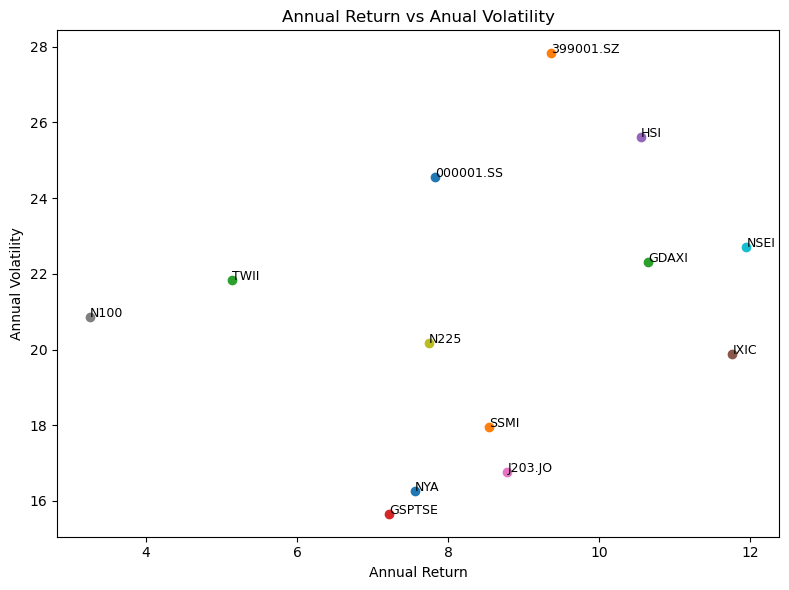

In [170]:
# Sort data based on Index & Date
index_fund = stock.sort_values(by=['Index', 'Date'])

# Calculate daily returns for each index 
index_fund['Daily Return'] = index_fund.groupby('Index')['Close'].pct_change().mul(100)

# Calculate annualized average return and volatility (stddev of daily return for each index) for each index
annual_performance = index_fund.groupby('Index').agg(
    Annual_Return=('Daily Return', lambda x: x.mean() * 252), # Multiply by 252 as there are 252 trading days in a year
    Annual_Volatility = ('Daily Return', lambda x: x.std() * (252**0.5)) # To calculate annual volatility, take the deviation and multiply by square root of trading days in a year
).reset_index() # Turn Index (index) into column

print(annual_performance.sort_values(by='Annual_Return',ascending = True))

# Visualize the annual performance by scatter plot
plt.figure(figsize = (8,6))

# Loop to put Index name to be on each dot
for i, row in annual_performance.iterrows():
    plt.scatter(row['Annual_Return'], row['Annual_Volatility'])
    plt.text(row['Annual_Return'], row['Annual_Volatility'], row['Index'], fontsize=9)
    
# Add labels and title
plt.title('Annual Return vs Anual Volatility')
plt.xlabel('Annual Return')
plt.ylabel('Annual Volatility')
plt.tight_layout()
plt.show()

# Filter out Index by annual average return (AAR) and volatility

For the scope of this project: I will set the benchmarks for AAR and volatility:
- AAR > 10 %

- Volatility < 25 %

Based on this standards, these are the top 4 indexes that I will do more analysis to avaluate its weekly and monthly performance to make further sugegstion:

- **NSEI (Nifty 50)**: This index shows the highest annual average return of approximately 11.95% with a volatility of 22.72%, indicating a strong performance with moderate risk.

- **IXIC (NASDAQ Composite)**: With an annual average return of about 11.76% and a volatility of 19.89%, it offers high returns with relatively lower risk compared to NSEI.

- **GDAXI (DAX)**: The German stock market index has an annual average return of 10.65% and a volatility of 22.31%, balancing between high returns and manageable risk.

- **HSI (Hang Seng Index)**: This index has an annual average return of 10.55% and a higher volatility of 25.61%, indicating higher risk but with substantial returns. This index is slightly over the benchmark but with good return so I still include it.


# Evaluate monthly and weekly performance of these 4 indexes

Because we want to pick index funs for short-term period so look into monthly and weekly performance can significantly help.

In [171]:
# Filter out data first
index_choices = index_fund[index_fund['Index'].isin(['NSEI','IXIC','GDAXI','HSI'])]

# Calculate monthly performance based on the format of the annual report
monthly_performance = index_choices.groupby('Index').agg(
    Monthly_Return=('Daily Return', lambda x: x.mean() * 21), # Multiply by 21 as there are 21 trading days in a month
    Monthly_Volatility = ('Daily Return', lambda x: x.std() * (21**0.5)) # To calculate monthly volatility, take the deviation and multiply by square root of trading days in a month
).reset_index() # Turn Index (index) into column

# Resample the DataFrame by month and aggregate the data by summing the volume for each index fund name
monthly_volume = index_choices.groupby('Index').resample('M').agg({'Volume': 'sum'})

# Group by Index to calculate monthly average volume in millions 
monthly_volume = monthly_volume.groupby('Index')['Volume'].mean().mul(1/1000000).reset_index()
monthly_volume.rename(columns={'Volume':'Monthly_Volume (millions)'},inplace=True)

# Merge with the monthly performance to have the completed performance by month for each selected Index
monthly_performance = pd.merge(monthly_performance,monthly_volume, how='inner', on='Index')

monthly_performance


,Index,Monthly_Return,Monthly_Volatility,Monthly_Volume (millions)
0,GDAXI,0.887556,6.441592,1433.700978
1,HSI,0.879080,7.392292,17292.073668
2,IXIC,0.980063,5.740783,20831.944669
3,NSEI,0.995725,6.558134,3.712476


From the monthly performance report, all of the Indexes has good return and low monthly volatility which means these index funds are not too risky to keep in portfolio. 

In terms of Monthly trading volume, except NSEI, the rest has high trading volume within a month so their liquidity is good enough when we need to convert to cash. Although the NSEI only has around 4 millions trading volume per month which is pretty low comparing to the other three, in general, it is still a good number to consider keep it as it might yield the best return while the risk is just moderate



# Short-term Forecast

**Forecast**: After carefully choose and evaluate the performance of these 4 selected funds, now I will use package ARIMA from statmodels to predict the price of each of them within the next 5 days. 

In [218]:
# Import ARIMA package
from statsmodels.tsa.arima.model import ARIMA
import warnings

# Ignore Value Warning
warnings.filterwarnings('ignore')


# Filter for selected Index funds
selected_indexes=['IXIC', 'NSEI', 'GDAXI', 'HSI']



# Create an empty forecast dictionary to display later


# For simplicity and due to computational limitations, we'll perform a simple ARIMA model with preset parameters
for index in selected_indexes:
    forecast_dict = {}
    
    # Extract the close price for the index
    series = index_fund[index_fund['Index'] == index]['Close']
    
    # Drop any Null Values 
    series = series.dropna()
    
    # Fir ARIMA model (Use preset parameters, might not be optimal)
    model = ARIMA(series, order =(1,1,1))
    model_fit = model.fit()
    
    # Forecast the next 5 days as a simple short-time prediction
    forecast = model_fit.forecast(steps=5)
    
    # Store the forecasrt results
    forecast_dict[index] = forecast

    df = pd.DataFrame(forecast_dict).reset_index()
    
    
    df.rename(columns={index:'Price'},inplace=True)

    print("Price in the next five days of", index)
    print(df['Price'])
    print("\t")
    

Price in the next five days of IXIC
0    13746.218283
1    13747.233280
2    13746.824779
3    13746.989187
4    13746.923018
Name: Price, dtype: float64
	
Price in the next five days of NSEI
0    15587.052736
1    15588.248882
2    15588.585301
3    15588.679920
4    15588.706532
Name: Price, dtype: float64
	
Price in the next five days of GDAXI
0    15420.855154
1    15420.731845
2    15420.676499
3    15420.651658
4    15420.640508
Name: Price, dtype: float64
	
Price in the next five days of HSI
0    29152.137039
1    29151.896319
2    29152.068645
3    29151.945281
4    29152.033595
Name: Price, dtype: float64
	


# Checking price movement from the latest 5 years of each index funds

We will use price USD in this case to see how these index funds run in the last 5 year

In [248]:
# Create DataFrame with column name is stock and Date as index

# Create a list of distinct year as a string to use .loc 
distinct_years = [str(year) for year in list(sorted(stock.index.year.unique()))]

# Create an empty df 
price_2015_2021 =pd.DataFrame()

# Loop to create a df with date as index and index names as columns
for index in selected_indexes:
    index_year=pd.DataFrame()
    
    # Loop to filter all the data within each year for each index over the last 5 year and rename column to index name
    for year in distinct_years[-5:]:
        price = stock[stock['Index']==index].loc[year,['CloseUSD']]
        price.rename(columns={'CloseUSD':index},inplace=True)
        index_year = pd.concat([index_year,price])
    
    # Concat to create a complete df
    price_2015_2021 = pd.concat([price_2015_2021,index_year],axis=1)




,IXIC,NSEI,GDAXI,HSI
Date,,,,
2017-01-02,NaN,81.795000,14149.962698,NaN
2017-01-03,5429.080078,81.922500,14132.773081,2879.552051
2017-01-04,5477.000000,81.905000,14132.857675,2877.481191
2017-01-05,5487.939941,82.737998,14133.627325,2919.369629
2017-01-06,5521.060059,82.437998,14150.791919,2925.391270
...,...,...,...,...
2021-05-25,13657.169920,152.084502,18867.409605,3758.411719
2021-05-26,13738.000000,153.014502,18849.878071,3791.581270
2021-05-27,13736.280270,153.378496,18796.211173,3784.715899


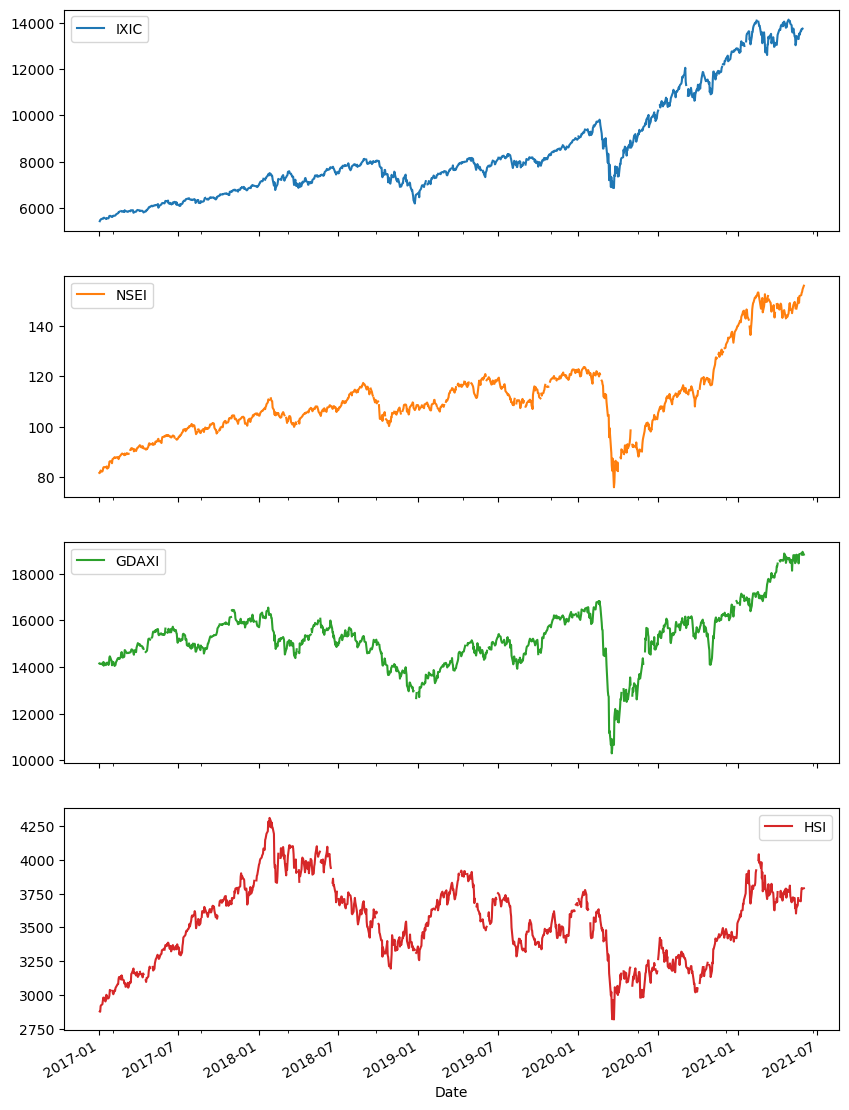

In [249]:
price_2015_2021.plot(subplots=True, figsize=(10, 15))
plt.show()

For each index, the movement may differs:

- For IXIC, NSEI, GDAXI: Current Prices are above at the Highest in the last 5 years and in the up trend
- For HSI: It is still in the up trend despite not passing the Highest in the last 5 years.



# Conclusion 

The analysis identifies the NSEI, IXIC, GDAXI, and HSI as promising indexes for investment based on historical performance and short-term forecasts. 

Each index presents a different risk-return profile, suitable for various investment strategies. While the forecasts suggest short-term stability, investors should consider long-term trends, market conditions, and economic factors when making investment decisions. Diversification across these indexes could mitigate specific risks and capitalize on global market opportunities.